#Assigment 3: Identifying cracks and damages in structures (Concrete structures)
<br>42028 Deep Learning and Convolutional Neural Network - Autumn 2020

<br>Carlos Mario Carvajal Moreno. Student ID: 13144148
<br>Andres Felipe Lagos. Student ID: 13092248
<br>Ernest Ilustre.  Student ID: 12763239

In [0]:
#Connecting to Google drive

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Importing the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input, decode_predictions
from keras.models import model_from_json

Using TensorFlow backend.


In [0]:
cd /content/gdrive/My Drive/A3 

/content/gdrive/My Drive/A3


In [0]:
ls

A3_CNN_Multiclass.ipynb  VGG16_A3_CNN_Deck.ipynb      VGG19_A3_CNN_Wall.ipynb
Concrete_Data_Final.zip  VGG16_A3_CNN_Pavement.ipynb  wall_model.json
deck_model.json          VGG16_A3_CNN_Wall.ipynb      Weights/
multiclass_model.json    VGG19_A3_CNN_Deck.ipynb
pavement_model.json      VGG19_A3_CNN_Pavement.ipynb


In [0]:
#Extraction of data and placing it in the temporary folder. The models work a lot better
local_zip = '/content/gdrive/My Drive/A3/Concrete_Data_Final.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
#Setting the path directory for training and validation sets
base_dir = '/tmp/Concrete_Data_Final'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Val')
test_dir = os.path.join(base_dir, 'Test')

#Train
# Directory with training Pavement Cracked Pictures
train_cracked_dir = os.path.join(train_dir, '/Pavement/Cracked')
# Directory with training Pavement Uncracked Pictures
train_Uncracked_dir = os.path.join(train_dir, '/Pavement/Uncracked')
# Directory with training Pavement Cracked Pictures
train_cracked_dir = os.path.join(train_dir, '/Wall/Cracked')
# Directory with training Pavement Uncracked Pictures
train_Uncracked_dir = os.path.join(train_dir, '/Wall/Uncracked')
# Directory with training Pavement Cracked Pictures
train_cracked_dir = os.path.join(train_dir, '/Deck/Cracked')
# Directory with training Pavement Uncracked Pictures
train_Uncracked_dir = os.path.join(train_dir, '/Deck/Uncracked')



#Val
# Directory with validation Pavement Cracked pictures
val_cracked_dir = os.path.join(validation_dir, '/Pavement/Cracked')
# Directory with validation Pavement Uncracked pictures
val_Uncracked_dir = os.path.join(validation_dir, '/Pavement/Uncracked')
# Directory with validation Pavement Cracked pictures
val_cracked_dir = os.path.join(validation_dir, '/Wall/Cracked')
# Directory with validation Pavement Uncracked pictures
val_Uncracked_dir = os.path.join(validation_dir, '/Wall/Uncracked')
# Directory with validation Pavement Cracked pictures
val_cracked_dir = os.path.join(validation_dir, '/Deck/Cracked')
# Directory with validation Pavement Uncracked pictures
val_Uncracked_dir = os.path.join(validation_dir, '/Deck/Uncracked')


#Test
# Directory with validation Pavement Cracked pictures
test_cracked_dir = os.path.join(test_dir, '/Pavement/Cracked')
# Directory with validation Pavement Uncracked pictures
test_Uncracked_dir = os.path.join(test_dir, '/Pavement/Uncracked')
# Directory with validation Pavement Cracked pictures
test_cracked_dir = os.path.join(test_dir, '/Wall/Cracked')
# Directory with validation Pavement Uncracked pictures
test_Uncracked_dir = os.path.join(test_dir, '/Wall/Uncracked')
# Directory with validation Pavement Cracked pictures
test_cracked_dir = os.path.join(test_dir, '/Deck/Cracked')
# Directory with validation Pavement Uncracked pictures
test_Uncracked_dir = os.path.join(test_dir, '/Deck/Uncracked')

In [0]:
# All images are rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   brightness_range = (0.9,1.1),
                                   fill_mode='nearest'
                                   )
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 16
image_size = 256

# Flow training images in batches of 16 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),  # Images are size 100X100
        batch_size= batch_size,
        class_mode='categorical')

# Flow validation images in batches of 16 using test_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size= batch_size,
        class_mode='categorical')

# Flow validation images in batches of 16 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_size, image_size),
        batch_size= batch_size,
        class_mode='categorical')

Found 12818 images belonging to 3 classes.
Found 3477 images belonging to 3 classes.
Found 39797 images belonging to 3 classes.


In [0]:
class_dict = train_generator.class_indices
class_dict

{'Deck': 0, 'Pavement': 1, 'Wall': 2}

In [0]:
#Downloading the inception ResNet V2 model with imagenet weights
conv_base = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(256,256,3))

219062272/219055592 [==============================] - 14s 0us/step


In [0]:
model = models.Sequential()
model.add(conv_base)

model.add(layers.Conv2D(128, kernel_size=(1,1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

model.add(layers.Dense(3, activation='softmax'))


In [0]:
conv_base.summary()
for layer in conv_base.layers[:-7]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in conv_base.layers:
    print(layer, layer.trainable)


model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 127, 127, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 127, 127, 32) 0           batch_normalization_1[0][0]      
________________________________________________________________________________

In [0]:
#compiling the model
model.compile(optimizer= optimizers.Adamax(learning_rate=0.001),
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
#checkpoint = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=1, period=3)
filepath='/content/gdrive/My Drive/A3/Weights/Multiclass_weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint= ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
json_string  = model.to_json()
f = open("model_architecture.json", 'w')
f.write(json_string)
f.close()

In [0]:
# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch= train_generator.n//train_generator.batch_size,
      epochs=20,
      validation_data=validation_generator,
      validation_steps= validation_generator.n//train_generator.batch_size,
      callbacks = [checkpoint],
      verbose=1,
      )

Epoch 1/20
801/801 [==============================] - 269s 335ms/step - loss: 0.6679 - accuracy: 0.7586 - val_loss: 3.4669 - val_accuracy: 0.8425
Epoch 2/20
801/801 [==============================] - 251s 313ms/step - loss: 0.4272 - accuracy: 0.8412 - val_loss: 0.7989 - val_accuracy: 0.8295
Epoch 3/20
801/801 [==============================] - 253s 316ms/step - loss: 0.3458 - accuracy: 0.8697 - val_loss: 0.2595 - val_accuracy: 0.8919
Epoch 4/20
801/801 [==============================] - 253s 316ms/step - loss: 0.3310 - accuracy: 0.8772 - val_loss: 0.1525 - val_accuracy: 0.8616
Epoch 5/20
801/801 [==============================] - 254s 317ms/step - loss: 0.3070 - accuracy: 0.8871 - val_loss: 13.3606 - val_accuracy: 0.8422
Epoch 6/20
801/801 [==============================] - 252s 315ms/step - loss: 0.2848 - accuracy: 0.8958 - val_loss: 0.1715 - val_accuracy: 0.9003
Epoch 7/20
801/801 [==============================] - 253s 316ms/step - loss: 0.2841 - accuracy: 0.8963 - val_loss: 0.1349 

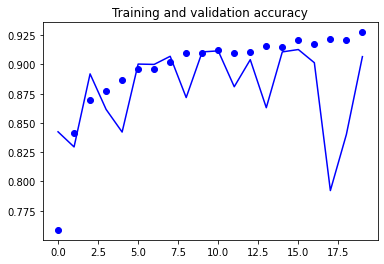

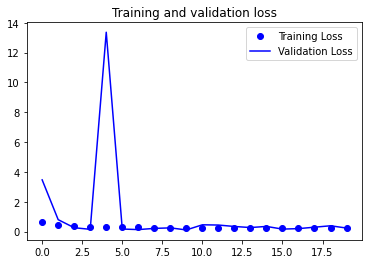

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_loss, test_acc = model.evaluate(test_generator)
test_acc

2488/2488 [==============================] - 309s 124ms/step


0.8844887614250183

## Loading a saved model.

In [0]:
## Go to the /tmp folder and copy the name of the last saved model
modelv2=tf.keras.models.load_model('/content/drive/My Drive/Weights/Pavement_weights.10-0.26.hdf5')

In [0]:
#compiling the model
modelv2.compile(optimizer= tf.keras.optimizers.Adamax(learning_rate=0.001),
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

In [0]:
#checkpoint = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=1, period=3)
#filepath='/content/drive/My Drive/Weights/Pavement_weights2.{epoch:02d}-{val_loss:.2f}.hdf5'
#checkpoint= ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [0]:
# Train the model
history = modelv2.fit(
      train_generator,
      steps_per_epoch= train_generator.n//train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps= validation_generator.n//train_generator.batch_size,
      #callbacks = [checkpoint],
      verbose=1,
      )